In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
fname = "./card_transdata.csv"
cardsData = pd.read_csv(fname)

print(cardsData.head())
print(cardsData.shape)

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  
(1000000, 8)


In [185]:
#labels = cardsData.columns.values
from sklearn.preprocessing import StandardScaler

cardsData = cardsData.loc[cardsData['ratio_to_median_purchase_price'] <= 17]
print(cardsData.shape)
cardsData = cardsData.loc[cardsData['distance_from_home'] <= 150]
print(cardsData.shape)

features = cardsData.copy()

labels = features.pop('fraud')

print(features)

(995138, 8)
(968756, 8)
        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                    

In [186]:
features = np.array(features)

In [187]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

In [188]:
print(x_train)

[[ 1.29940714  1.59443735  3.46710216 ...  0.          0.
   1.        ]
 [40.78418184  4.80728145  3.06719971 ...  0.          0.
   1.        ]
 [14.50011314  0.32981004  0.78091302 ...  0.          0.
   1.        ]
 ...
 [15.41586467  5.79994914  0.40820516 ...  1.          0.
   1.        ]
 [ 2.23666881  2.32582421  1.21989202 ...  1.          0.
   1.        ]
 [16.97466195  0.52337585  0.1861598  ...  0.          0.
   1.        ]]


In [189]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(775004, 7)
(193752, 7)
(775004,)
(193752,)


In [190]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [192]:
cards_model = tf.keras.Sequential([
    keras.Input(shape=x_train.shape[1:]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [193]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.Accuracy(name="accuracy")
]

cards_model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = metrics)

cards_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
history = cards_model.fit(
    x_train, 
    y_train, 
    epochs=25,
    validation_split = 0.15)

Epoch 1/25
20587/20587 ━━━━━━━━━━━━━━━━━━━━ 16s 716us/step - accuracy: 0.0012 - fn: 4436.1831 - fp: 2420.1335 - loss: 0.0758 - precision: 0.8517 - recall: 0.7605 - tn: 301756.8125 - tp: 20138.8438 - val_accuracy: 0.0100 - val_fn: 376.0000 - val_fp: 701.0000 - val_loss: 0.0214 - val_precision: 0.9223 - val_recall: 0.9567 - val_tn: 106858.0000 - val_tp: 8316.0000
Epoch 2/25
20587/20587 ━━━━━━━━━━━━━━━━━━━━ 14s 699us/step - accuracy: 0.0135 - fn: 1441.2970 - fp: 1104.0337 - loss: 0.0206 - precision: 0.9533 - recall: 0.9397 - tn: 303306.4688 - tp: 23236.8496 - val_accuracy: 0.0560 - val_fn: 232.0000 - val_fp: 345.0000 - val_loss: 0.0118 - val_precision: 0.9608 - val_recall: 0.9733 - val_tn: 107214.0000 - val_tp: 8460.0000
Epoch 3/25
20587/20587 ━━━━━━━━━━━━━━━━━━━━ 14s 687us/step - accuracy: 0.0429 - fn: 1295.9954 - fp: 877.8876 - loss: 0.0180 - precision: 0.9646 - recall: 0.9474 - tn: 304060.4688 - tp: 23385.9512 - val_accuracy: 0.0738 - val_fn: 138.0000 - val_fp: 171.0000 - val_loss: 0.0

In [195]:
score = cards_model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.007244396489113569
Test accuracy: 527.0


In [196]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'fn', 'fp', 'loss', 'precision', 'recall', 'tn', 'tp', 'val_accuracy', 'val_fn', 'val_fp', 'val_loss', 'val_precision', 'val_recall', 'val_tn', 'val_tp'])

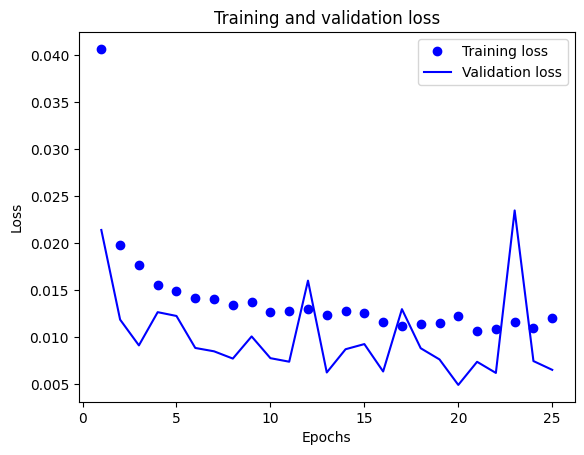

In [197]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()